# Appendix 3: Python Libraries Crash Course

## Part 7: Data Visualization with Seaborn

## First Steps

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [6]:
titanic = pd.read_csv("titanic.csv")

In [7]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN


In [8]:
titanic['pclass'] = titanic['pclass'].astype(str) # required to avoid AttributeError: 'numpy.int64' object has no attribute 'startswith'

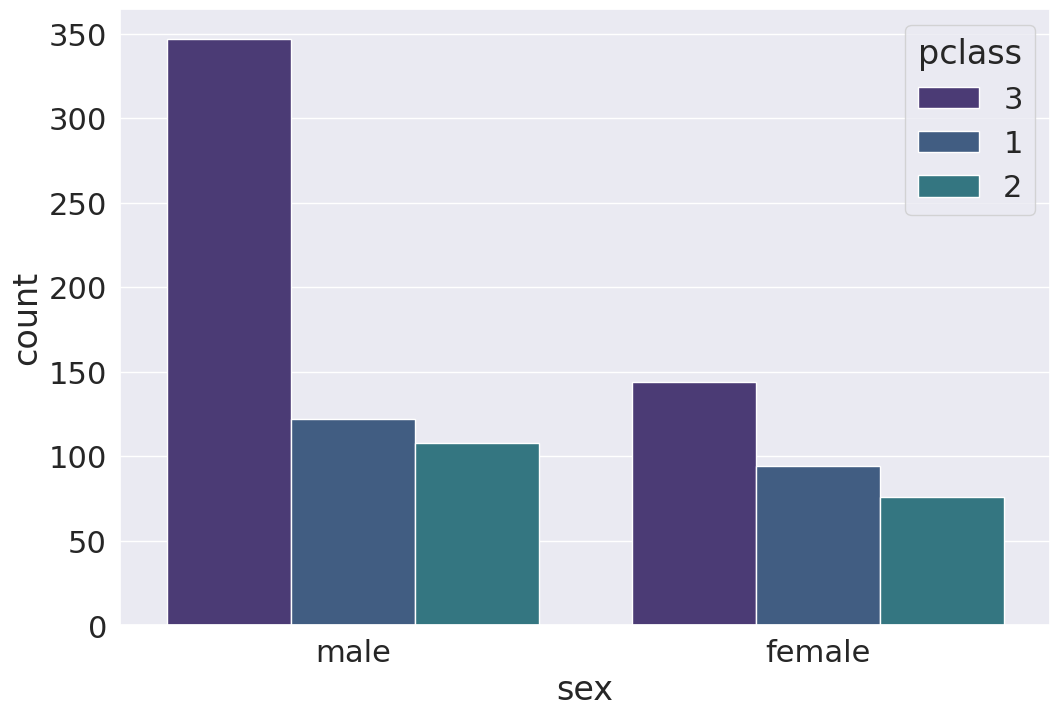

In [9]:
plt.figure(figsize=(12,8))
sns.set(font_scale = 2, palette = "viridis")
sns.countplot(data = titanic, x = "sex", hue = "pclass")
plt.show()

## Categorical Plots

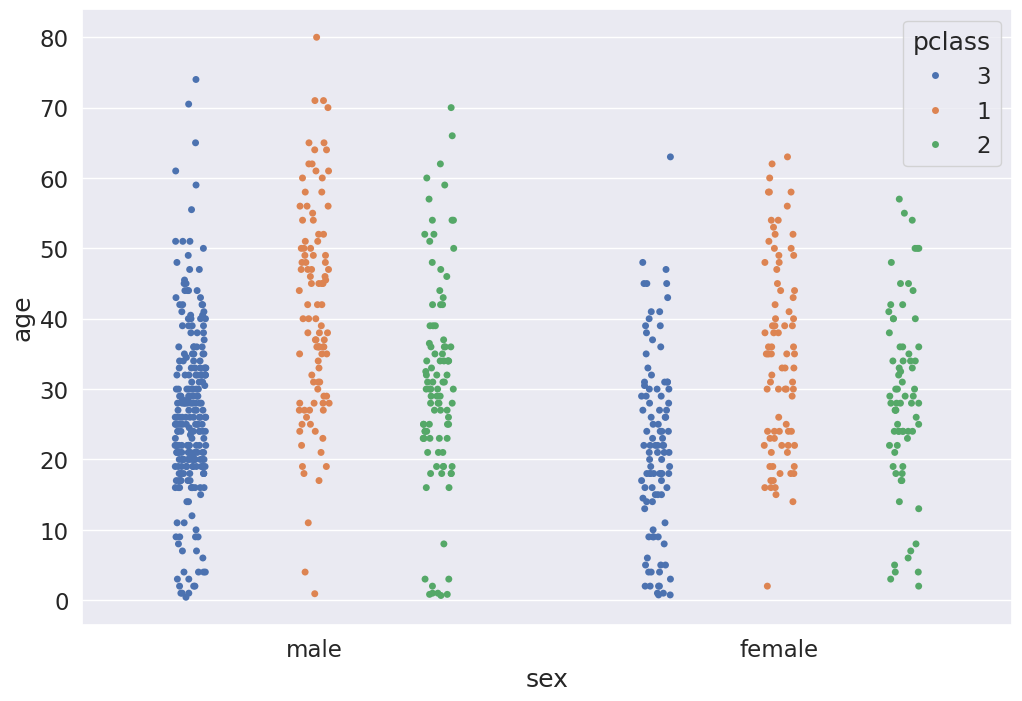

In [10]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.5)
sns.stripplot(data = titanic, x = "sex", y = "age", jitter = True, hue = "pclass", dodge = True)
plt.show()

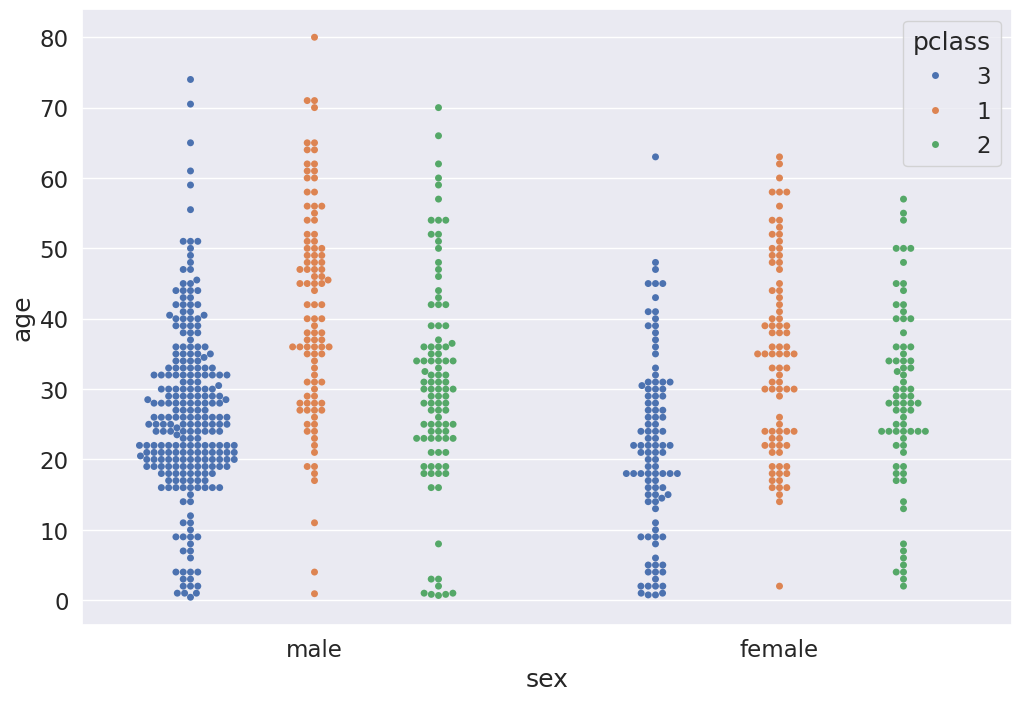

In [11]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.5)
sns.swarmplot(data = titanic, x = "sex", y = "age", hue = "pclass", dodge = True)
plt.show()

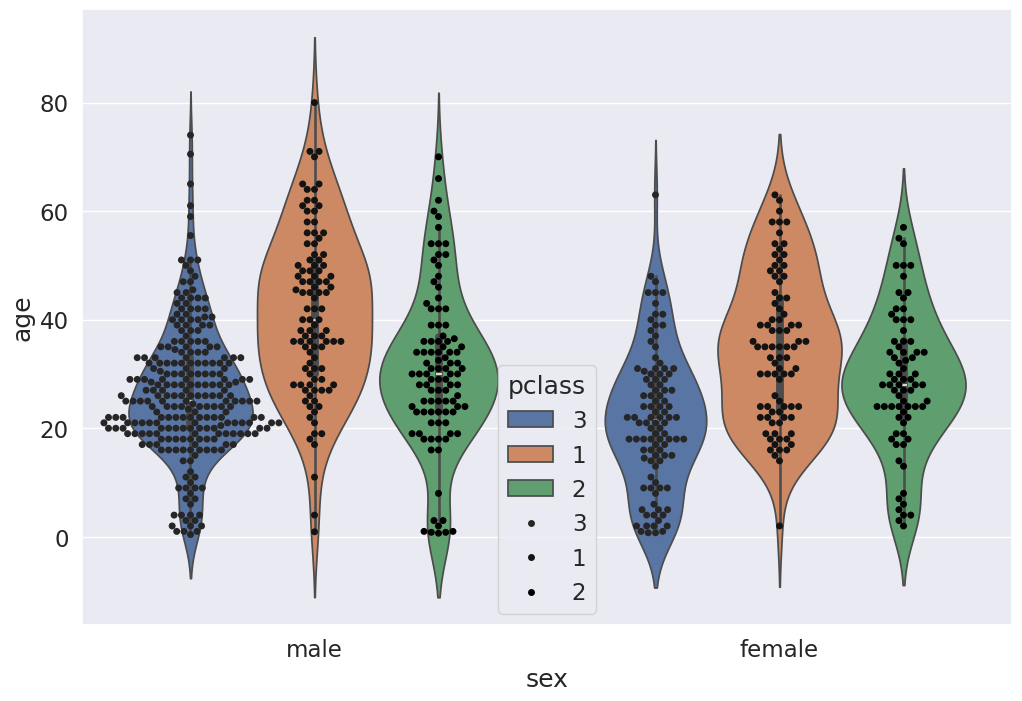

In [12]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.5)
sns.violinplot(data = titanic, x = "sex", y = "age", hue = "pclass", dodge = True)
sns.swarmplot(data = titanic, x = "sex", y = "age", hue = "pclass", dodge = True, color="black")
plt.show()

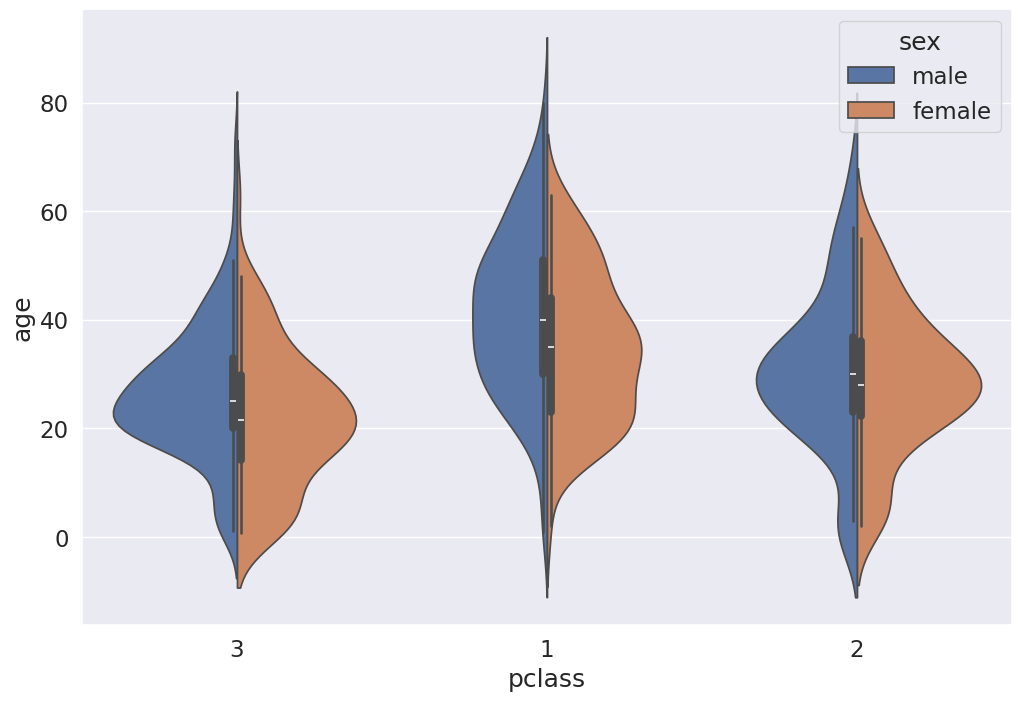

In [13]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.5)
sns.violinplot(data = titanic, x = "pclass", y = "age", hue = "sex", dodge = True, split = True )
plt.show()

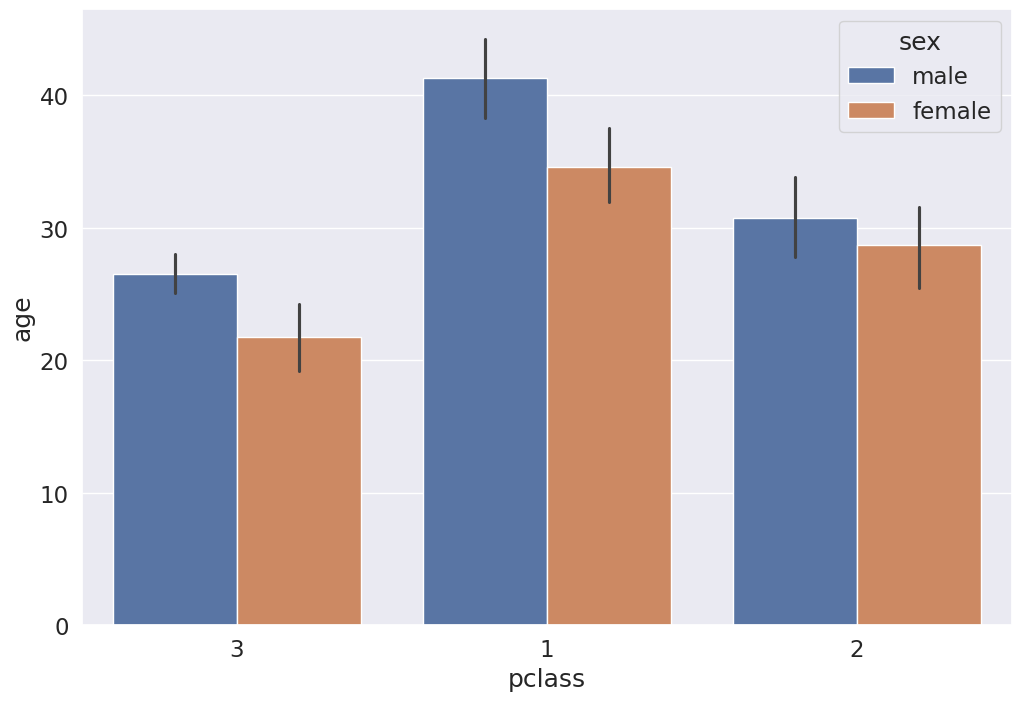

In [14]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.5)
sns.barplot(data = titanic, x = "pclass", y = "age", hue = "sex", dodge = True)
plt.show()

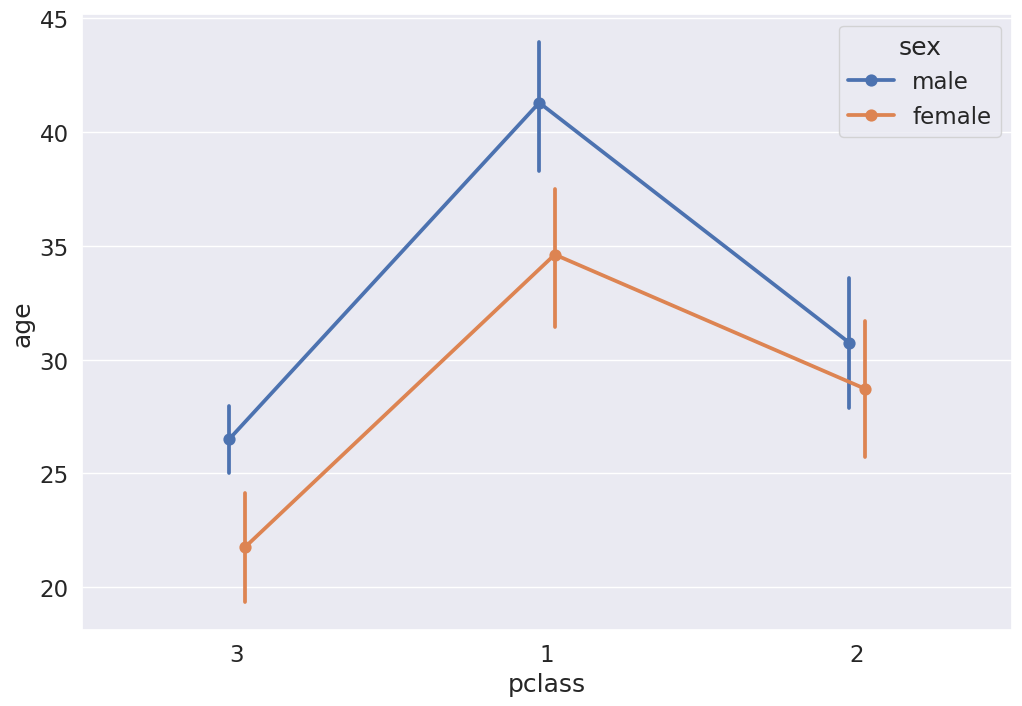

In [15]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.5)
sns.pointplot(data = titanic, x = "pclass", y = "age", hue = "sex", dodge = True)
plt.show()

## Jointplots / Regression

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
titanic = pd.read_csv("titanic.csv")

In [18]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN


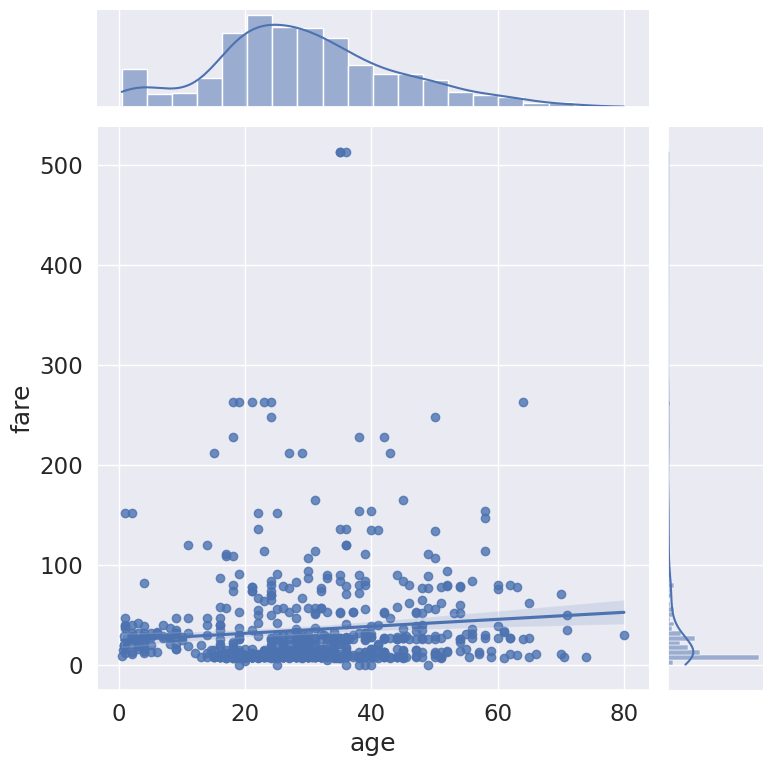

In [19]:
sns.set(font_scale=1.5)
sns.jointplot(data = titanic, x = "age", y = "fare", height = 8, kind = "reg")
plt.show()

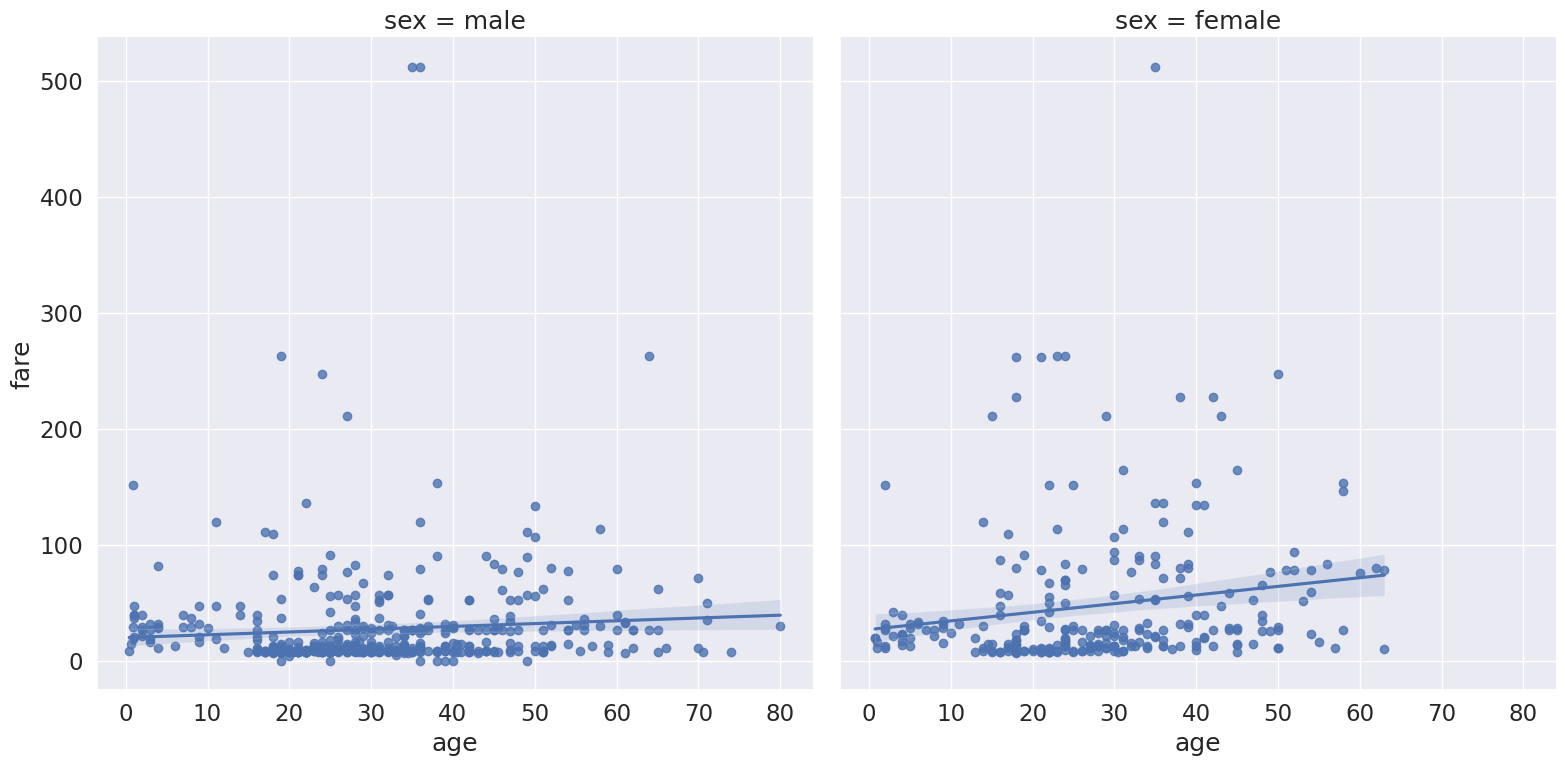

In [20]:
sns.set(font_scale=1.5)
sns.lmplot(data = titanic, x = "age", y = "fare", aspect= 1, height=8, col = "sex")
plt.show()

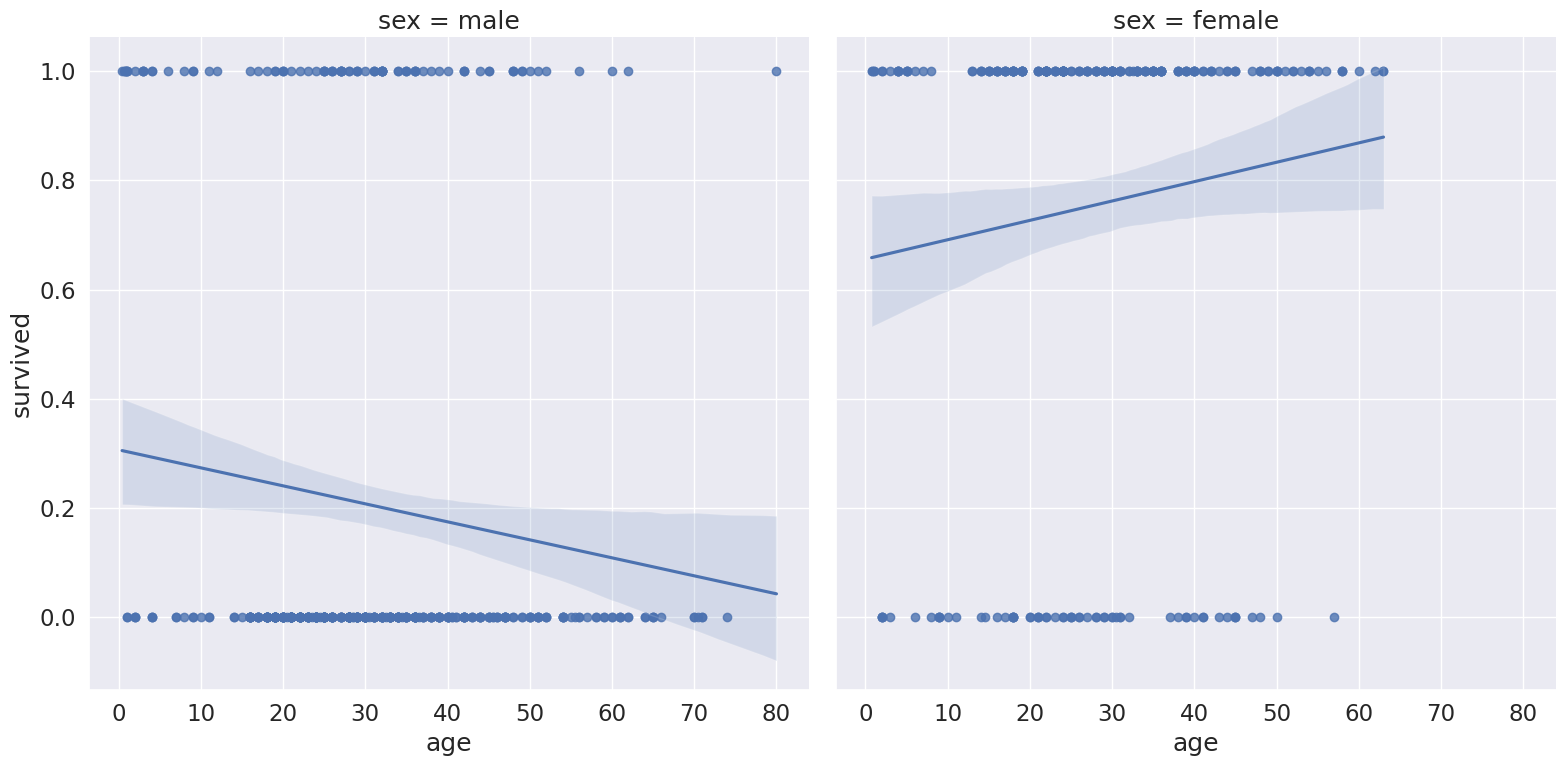

In [5]:
sns.set(font_scale=1.5)
sns.lmplot(data = titanic, x = "age", y = "survived", aspect= 1, height=8, col = "sex")
plt.show()

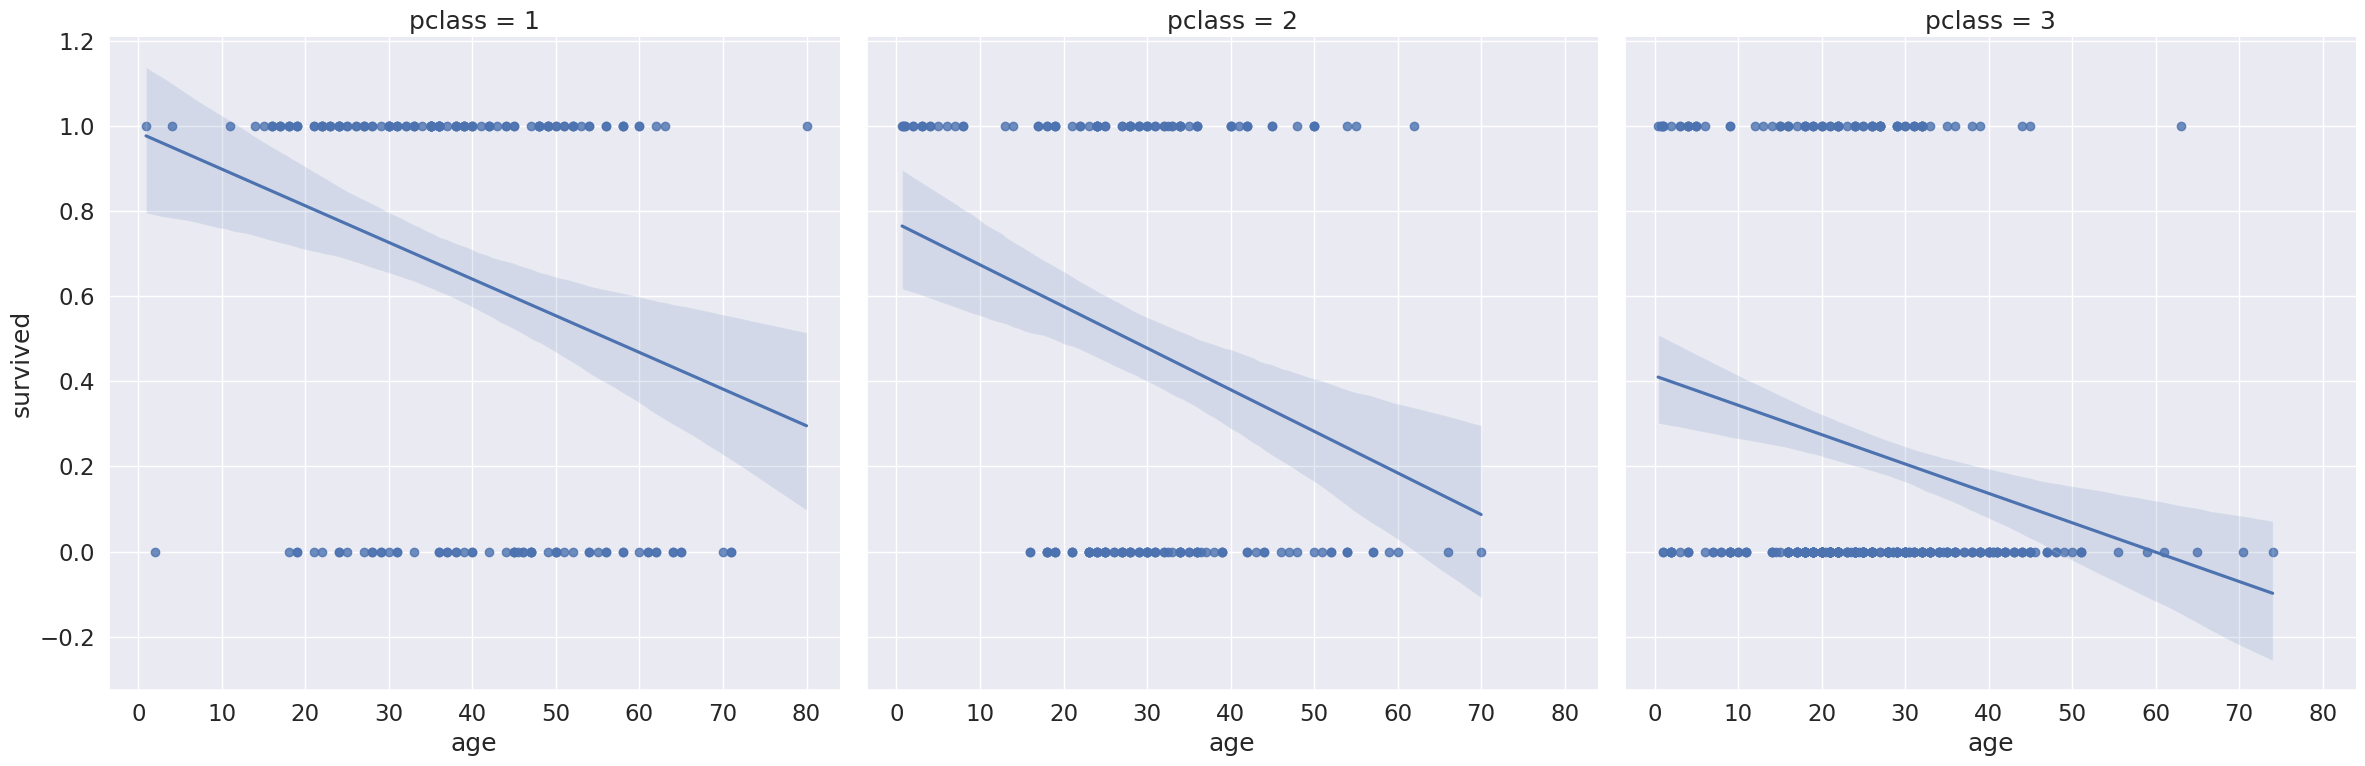

In [4]:
sns.set(font_scale=1.5)
sns.lmplot(data = titanic, x = "age", y = "survived", aspect= 1, height=8, col = "pclass")
plt.show()

## Matrixplots / Heatmaps

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
titanic = pd.read_csv("titanic.csv")

In [26]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN


In [27]:
pd.crosstab(titanic.sex, titanic.pclass)

pclass,1,2,3
sex,,,
female,94,76,144
male,122,108,347


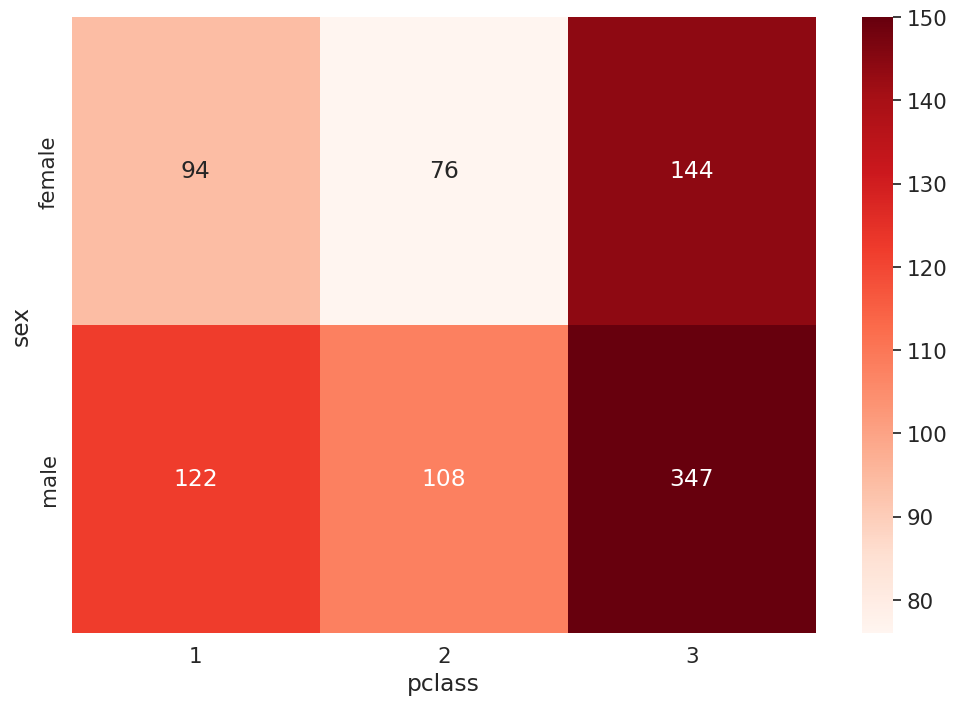

In [28]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.4)
sns.heatmap(pd.crosstab(titanic.sex, titanic.pclass), annot= True, fmt = "d", cmap = "Reds", vmax = 150)
plt.show()

In [29]:
pd.crosstab(titanic.sex, titanic.pclass, values= titanic.survived, aggfunc= "mean")

pclass,1,2,3
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


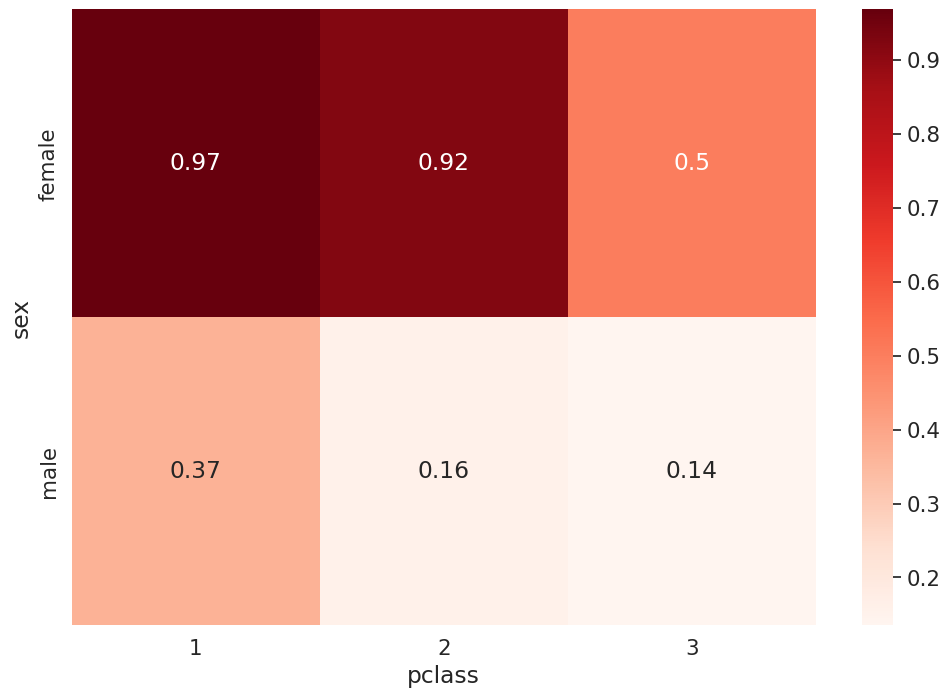

In [30]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.4)
sns.heatmap(pd.crosstab(titanic.sex, titanic.pclass, values= titanic.survived, aggfunc= "mean"), annot= True, cmap = "Reds")
plt.show()

In [31]:
titanic.corr(numeric_only = True) # new since Pandas 2.0: numeric_only required with mixed data types

,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


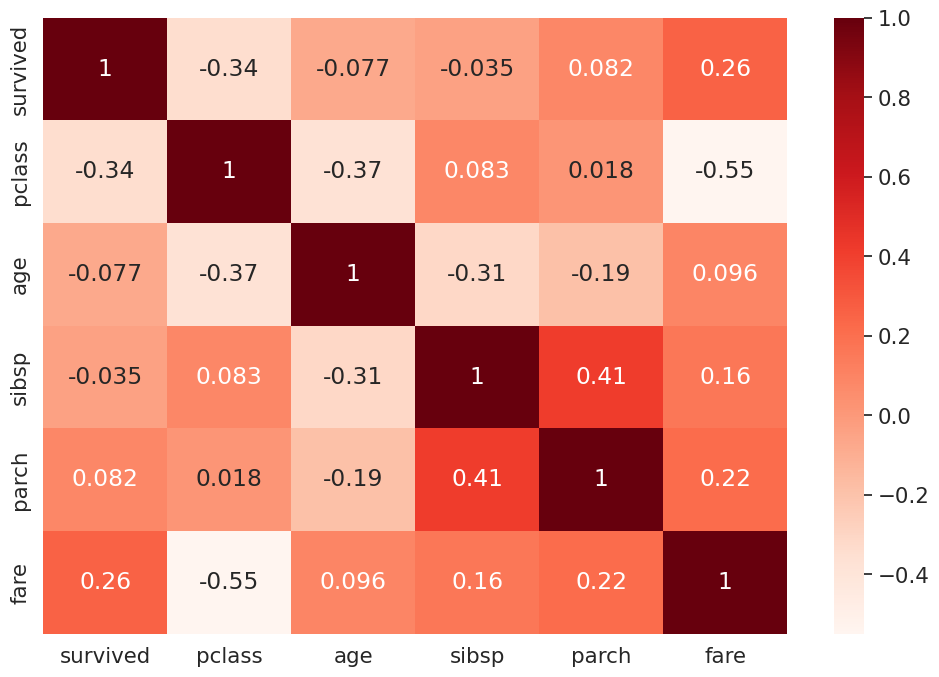

In [32]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.4)
sns.heatmap(titanic.corr(numeric_only = True), annot= True, cmap = "Reds")
plt.show()